## Import / Install Libraries

In [1]:
import pandas as pd

In [2]:
import tensorflow as tf 

In [3]:
!pip install keras 

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from keras import models
from keras import layers

In [7]:
from keras.layers import Dropout
from keras import regularizers
from keras.layers import Activation, Dense

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
from sklearn.metrics import r2_score

In [10]:
from matplotlib import pyplot as plt

In [11]:
from keras.models import load_model

## Reading the Dataset

In [12]:
df = pd.read_csv('C:/Users/Student/Documents/Devamsh/DM/Project/finaldata.csv')

In [13]:
df

,fuel,gear,hp,year,mileage,price
0,2,0,116,2011,235000,6800
1,0,0,122,2011,92800,6877
2,0,0,160,2011,149300,6900
3,0,0,110,2011,96200,6950
4,0,0,156,2011,156000,6950
...,...,...,...,...,...,...
48588,0,0,133,2019,23609,7800
48589,0,0,133,2018,34553,9200
48590,0,0,133,2018,31594,9200
48591,0,0,133,2018,32557,9200


## Removing Decimal Values

In [14]:
df['mileage'] = df['mileage'].astype(str).apply(lambda x: x.replace('.0',''))
df['gear'] = df['gear'].astype(str).apply(lambda x: x.replace('.0',''))
df['fuel'] = df['fuel'].astype(str).apply(lambda x: x.replace('.0',''))

## Checking Data Types

In [15]:
print(df.dtypes)

fuel       object
gear       object
hp          int64
year        int64
mileage    object
price       int64
dtype: object


## Data Information 

In [16]:
df.info

<bound method DataFrame.info of       fuel gear   hp  year mileage  price
0        2    0  116  2011  235000   6800
1        0    0  122  2011   92800   6877
2        0    0  160  2011  149300   6900
3        0    0  110  2011   96200   6950
4        0    0  156  2011  156000   6950
...    ...  ...  ...   ...     ...    ...
48588    0    0  133  2019   23609   7800
48589    0    0  133  2018   34553   9200
48590    0    0  133  2018   31594   9200
48591    0    0  133  2018   32557   9200
48592    0    0  133  2018   31371   9200

[48593 rows x 6 columns]>

## Classifying dataframe into Numeric and Target Columns:

In [17]:
target_columns = ['price']
numeric_columns = ['mileage', 'year', 'hp','fuel','gear']

## Calculating Average Price

In [18]:
average_price = df['price'].mean()
print('Average price is ${:.2f}'.format(average_price))

Average price is $16735.84


## Spliting dataframe into Training, Testing and Validation Data.

In [19]:
training_validation_data, testing_data = train_test_split(df, test_size = 0.2)
training_data, validation_data = train_test_split(training_validation_data, test_size = 0.5)

## Viewing Size of each data

In [20]:
print(training_validation_data.shape, validation_data.shape, testing_data.shape, training_data.shape)

(38874, 6) (19437, 6) (9719, 6) (19437, 6)


## Normalizing the Numeric Input Data

In [21]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_columns])
training_data[numeric_columns] = scaler.transform(training_data[numeric_columns])
testing_data[numeric_columns] = scaler.transform(testing_data[numeric_columns])
validation_data[numeric_columns] = scaler.transform(validation_data[numeric_columns])

## Creating Input and Output Data:

In [22]:
training_inputs = training_data[numeric_columns]
testing_inputs = testing_data[numeric_columns]
validation_inputs = validation_data[numeric_columns]

training_outputs = training_data[target_columns]
testing_outputs = testing_data[target_columns]
validation_outputs = validation_data[target_columns]

# Neural Network Model:

#### Below cell will run faster if GPU is activated.

In [23]:
# Optimizer: Adam 
# Activation: Relu
# To reduce Overfitting : L2 Regularizers and DropOut
# Metrics : RMSE

network1 = models.Sequential([
    Dense(100, activation='relu', input_shape=(5,)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='relu', kernel_regularizer=regularizers.l2(0.01))
])

network1.compile(optimizer='adam', loss='MeanSquaredError', metrics=['RootMeanSquaredError'])

# Training 
n_epochs =50 # the maximum number of steps in a epoch
result1 = network1.fit(training_inputs, training_outputs,epochs = n_epochs, batch_size = 128,
                     validation_data=(validation_inputs,validation_outputs))

Epoch 1/50
152/152 [==============================] - 2s 7ms/step - loss: 490495968.0000 - root_mean_squared_error: 22147.1445 - val_loss: 324745696.0000 - val_root_mean_squared_error: 18020.7012
Epoch 2/50
152/152 [==============================] - 1s 5ms/step - loss: 289391744.0000 - root_mean_squared_error: 17011.5176 - val_loss: 294897024.0000 - val_root_mean_squared_error: 17172.5664
Epoch 3/50
152/152 [==============================] - 1s 5ms/step - loss: 264682064.0000 - root_mean_squared_error: 16269.0527 - val_loss: 267105296.0000 - val_root_mean_squared_error: 16343.3564
Epoch 4/50
152/152 [==============================] - 1s 5ms/step - loss: 223586544.0000 - root_mean_squared_error: 14952.8105 - val_loss: 212918800.0000 - val_root_mean_squared_error: 14591.7373
Epoch 5/50
152/152 [==============================] - 1s 6ms/step - loss: 171256832.0000 - root_mean_squared_error: 13086.5117 - val_loss: 150467744.0000 - val_root_mean_squared_error: 12266.5283
Epoch 6/50
152/152 [

Epoch 43/50
152/152 [==============================] - 1s 6ms/step - loss: 101328272.0000 - root_mean_squared_error: 10066.1934 - val_loss: 99956312.0000 - val_root_mean_squared_error: 9997.8145
Epoch 44/50
152/152 [==============================] - 1s 6ms/step - loss: 96581624.0000 - root_mean_squared_error: 9827.5928 - val_loss: 102017512.0000 - val_root_mean_squared_error: 10100.3701
Epoch 45/50
152/152 [==============================] - 1s 5ms/step - loss: 104717064.0000 - root_mean_squared_error: 10233.1328 - val_loss: 99616920.0000 - val_root_mean_squared_error: 9980.8252
Epoch 46/50
152/152 [==============================] - 1s 6ms/step - loss: 100094456.0000 - root_mean_squared_error: 10004.7197 - val_loss: 97434240.0000 - val_root_mean_squared_error: 9870.8760
Epoch 47/50
152/152 [==============================] - 1s 6ms/step - loss: 98230736.0000 - root_mean_squared_error: 9911.1406 - val_loss: 97513288.0000 - val_root_mean_squared_error: 9874.8799
Epoch 48/50
152/152 [======

## MODEL EVALUATION

### Mean Squared Error:


In [24]:
testing_predictions = network1.predict(testing_inputs)
testing_error = mean_squared_error(testing_outputs, testing_predictions, squared=False)
print('Percentage test error = {:.2f}%'.format(100*testing_error/average_price))

304/304 [==============================] - 0s 1ms/step
Percentage test error = 42.35%


### Accuracy using R2 Score:

In [41]:
(r2_score(testing_outputs, testing_predictions))

0.8362211316675321

##  DATA VISUALIZATION

In [26]:
history_dict = result1.history
print(history_dict.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


### Validation Data Loss Plot:

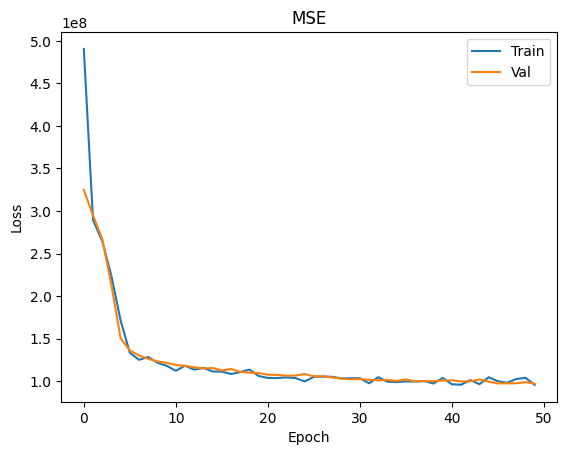

In [42]:
plt.plot(result1.history['loss'])
plt.plot(result1.history['val_loss'])
plt.title('MSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


### Root Mean Square Error Plot:

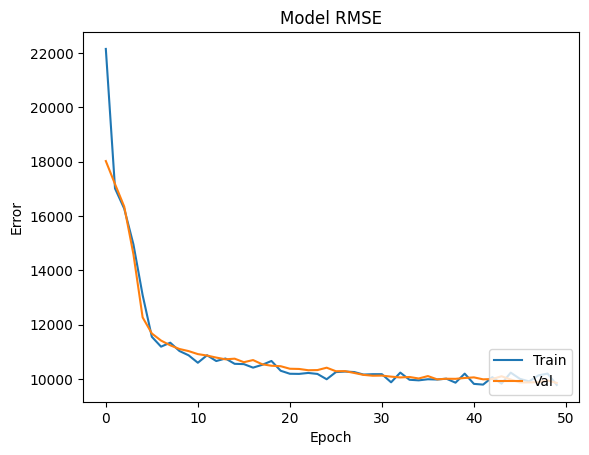

In [28]:
plt.plot(result1.history['root_mean_squared_error'])
plt.plot(result1.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Saving the Model:

In [31]:
network1.save('Final_Model.py')

INFO:tensorflow:Assets written to: Final_Model.py\assets


INFO:tensorflow:Assets written to: Final_Model.py\assets


## To load the Saved Model

In [34]:
new_model = tf.keras.models.load_model('Final_Model.py')